<a href="https://colab.research.google.com/github/HemanthNallamothu/datasets/blob/master/Sample_project/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  #Pandas library for reading csv file
import numpy as np   #Numpy library for converting data into array
Dataset=pd.read_csv('mainSimulationAccessTraces.csv')
Dataset.value.fillna(value=np.nan, inplace=True)
x=Dataset.iloc[:,:-2].values
y=Dataset.iloc[:,12].values



In [ ]:
Dataset['value'].replace(np.nan,Dataset['value'].mean( skipna = True))


TypeError: ignored

In [ ]:
np.any(np.isnan(Dataset))

np.all(np.isfinite(Dataset))

False

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble as ske
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

le = LabelEncoder()
le.fit_transform(Dataset.sourceID)
Dataset.sourceID = le.transform(Dataset.sourceID)
le.fit_transform(Dataset.sourceAddress)
Dataset.sourceAddress = le.transform(Dataset.sourceAddress)
le.fit_transform(Dataset.sourceType)
Dataset.sourceType = le.transform(Dataset.sourceType)
le.fit_transform(Dataset.sourceLocation)
Dataset.sourceLocation = le.transform(Dataset.sourceLocation)
le.fit_transform(Dataset.destinationServiceAddress)
Dataset.destinationServiceAddress = le.transform(Dataset.destinationServiceAddress)
le.fit_transform(Dataset.destinationServiceType)
Dataset.destinationServiceType = le.transform(Dataset.destinationServiceType)
le.fit_transform(Dataset.destinationLocation)
Dataset.destinationLocation = le.transform(Dataset.destinationLocation)
le.fit_transform(Dataset.accessedNodeAddress)
Dataset.accessedNodeAddress = le.transform(Dataset.accessedNodeAddress)
le.fit_transform(Dataset.accessedNodeType)
Dataset.accessedNodeType = le.transform(Dataset.accessedNodeType)
le.fit_transform(Dataset.value)
Dataset.value=le.transform(Dataset.value)


le.fit_transform(Dataset.operation)
Dataset.operation = le.transform(Dataset.operation)
le.fit_transform(Dataset.normality)
Dataset.normality = le.transform(Dataset.normality)

y_data = Dataset['normality']
x_data = Dataset.drop('normality', axis = 1)
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.2)

algorithms = {
        "DecisionTree": tree.DecisionTreeClassifier(max_depth=10),
        #The max_depth parameter denotes maximum depth of the tree.
    
        "RandomForest": ske.RandomForestClassifier(n_estimators=50),#In case, of random forest, these ensemble classifiers are            the randomly created decision trees. Each decision tree is a single classifier and the target prediction is based on            the majority voting method.
         #n_estimators ==The number of trees in the forest.
    
        "GradientBoosting": ske.GradientBoostingClassifier(n_estimators=50),
        "AdaBoost": ske.AdaBoostClassifier(n_estimators=100),
         #Ada mean Adaptive
         #Both are boosting algorithms which means that they convert a set of weak learners into a single strong learner. They            both initialize a strong learner (usually a decision tree) and iteratively create a weak learner that is added to the            strong learner. They differ on how they create the weak learners during the iterative process.
    
        "GNB": GaussianNB()
        #Bayes theorem is based on conditional probability. The conditional probability helps us calculating the probability             that something will happen
}
results = {}
print("\nNow testing algorithms")
for algo in algorithms:
    clf = algorithms[algo]
    clf.fit(x_training_data, y_training_data)#fit may be called as 'trained'
    score = clf.score(x_test_data, y_test_data)
    print("%s : %f %%" % (algo, score*100))
    results[algo] = score

winner = max(results, key=results.get)
print('\nWinner algorithm is %s with a %f %% success' % (winner, results[winner]*100))

#model = LogisticRegression()
#model.fit(x_training_data, y_training_data)






Now testing algorithms


ValueError: ignored

In [ ]:
Dataset.head(15)
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253059 entries, 0 to 253058
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   sourceID                   253059 non-null  int64  
 1   sourceAddress              253059 non-null  int64  
 2   sourceType                 253059 non-null  int64  
 3   sourceLocation             253059 non-null  int64  
 4   destinationServiceAddress  253059 non-null  int64  
 5   destinationServiceType     253059 non-null  int64  
 6   destinationLocation        253059 non-null  int64  
 7   accessedNodeAddress        253059 non-null  int64  
 8   accessedNodeType           253059 non-null  int64  
 9   operation                  253059 non-null  int64  
 10  value                      253059 non-null  int64  
 11  timestamp                  253058 non-null  float64
 12  normality                  253059 non-null  int64  
dtypes: float64(1), int64(12)
memo

In [ ]:
Dataset.describe()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,timestamp
count,290157.000000,290157.000000,290157.000000,290157.000000,290157.000000,290157.000000,290157.000000,290157.000000,290157.000000,2.901560e+05
mean,38.520153,44.568148,2.762732,8.573903,42.436340,2.253087,8.707865,85.016508,4.372037,1.520070e+12
std,30.224259,27.585363,2.229891,5.495124,26.750674,1.800856,5.207997,53.200907,2.875452,2.079208e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.520032e+12
25%,15.000000,16.000000,2.000000,5.000000,16.000000,0.000000,5.000000,32.000000,1.000000,1.520052e+12
50%,29.000000,43.000000,2.000000,8.000000,43.000000,3.000000,7.000000,86.000000,4.000000,1.520072e+12
75%,71.000000,73.000000,4.000000,12.000000,71.000000,4.000000,12.000000,140.000000,8.000000,1.520088e+12
max,83.000000,87.000000,7.000000,20.000000,84.000000,7.000000,20.000000,169.000000,12.000000,1.520104e+12


In [ ]:
Dataset.isnull().sum()

sourceID                     0
sourceAddress                0
sourceType                   0
sourceLocation               0
destinationServiceAddress    0
destinationServiceType       0
destinationLocation          0
accessedNodeAddress          0
accessedNodeType             0
operation                    0
value                        0
timestamp                    1
normality                    0
dtype: int64

In [ ]:
Dataset.shape

(290157, 13)

In [ ]:
Dataset.corr()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,timestamp
sourceID,1.000000,0.157382,0.905433,0.087514,0.085618,0.231876,0.115342,0.082932,0.358156,-0.038242
sourceAddress,0.157382,1.000000,0.039987,-0.014709,0.987739,0.014085,0.093115,0.987273,0.056354,0.010635
sourceType,0.905433,0.039987,1.000000,-0.005303,-0.042312,0.125005,0.040974,-0.043902,0.167935,-0.021995
sourceLocation,0.087514,-0.014709,-0.005303,1.000000,0.000318,0.307090,0.950369,-0.003535,0.288494,0.038619
destinationServiceAddress,0.085618,0.987739,-0.042312,0.000318,1.000000,0.083616,0.111186,0.999852,0.106023,0.022716
destinationServiceType,0.231876,0.014085,0.125005,0.307090,0.083616,1.000000,0.309525,0.086671,0.889786,0.101730
destinationLocation,0.115342,0.093115,0.040974,0.950369,0.111186,0.309525,1.000000,0.107522,0.279661,0.041211
accessedNodeAddress,0.082932,0.987273,-0.043902,-0.003535,0.999852,0.086671,0.107522,1.000000,0.106184,0.021974
accessedNodeType,0.358156,0.056354,0.167935,0.288494,0.106023,0.889786,0.279661,0.106184,1.000000,0.117483
timestamp,-0.038242,0.010635,-0.021995,0.038619,0.022716,0.101730,0.041211,0.021974,0.117483,1.000000


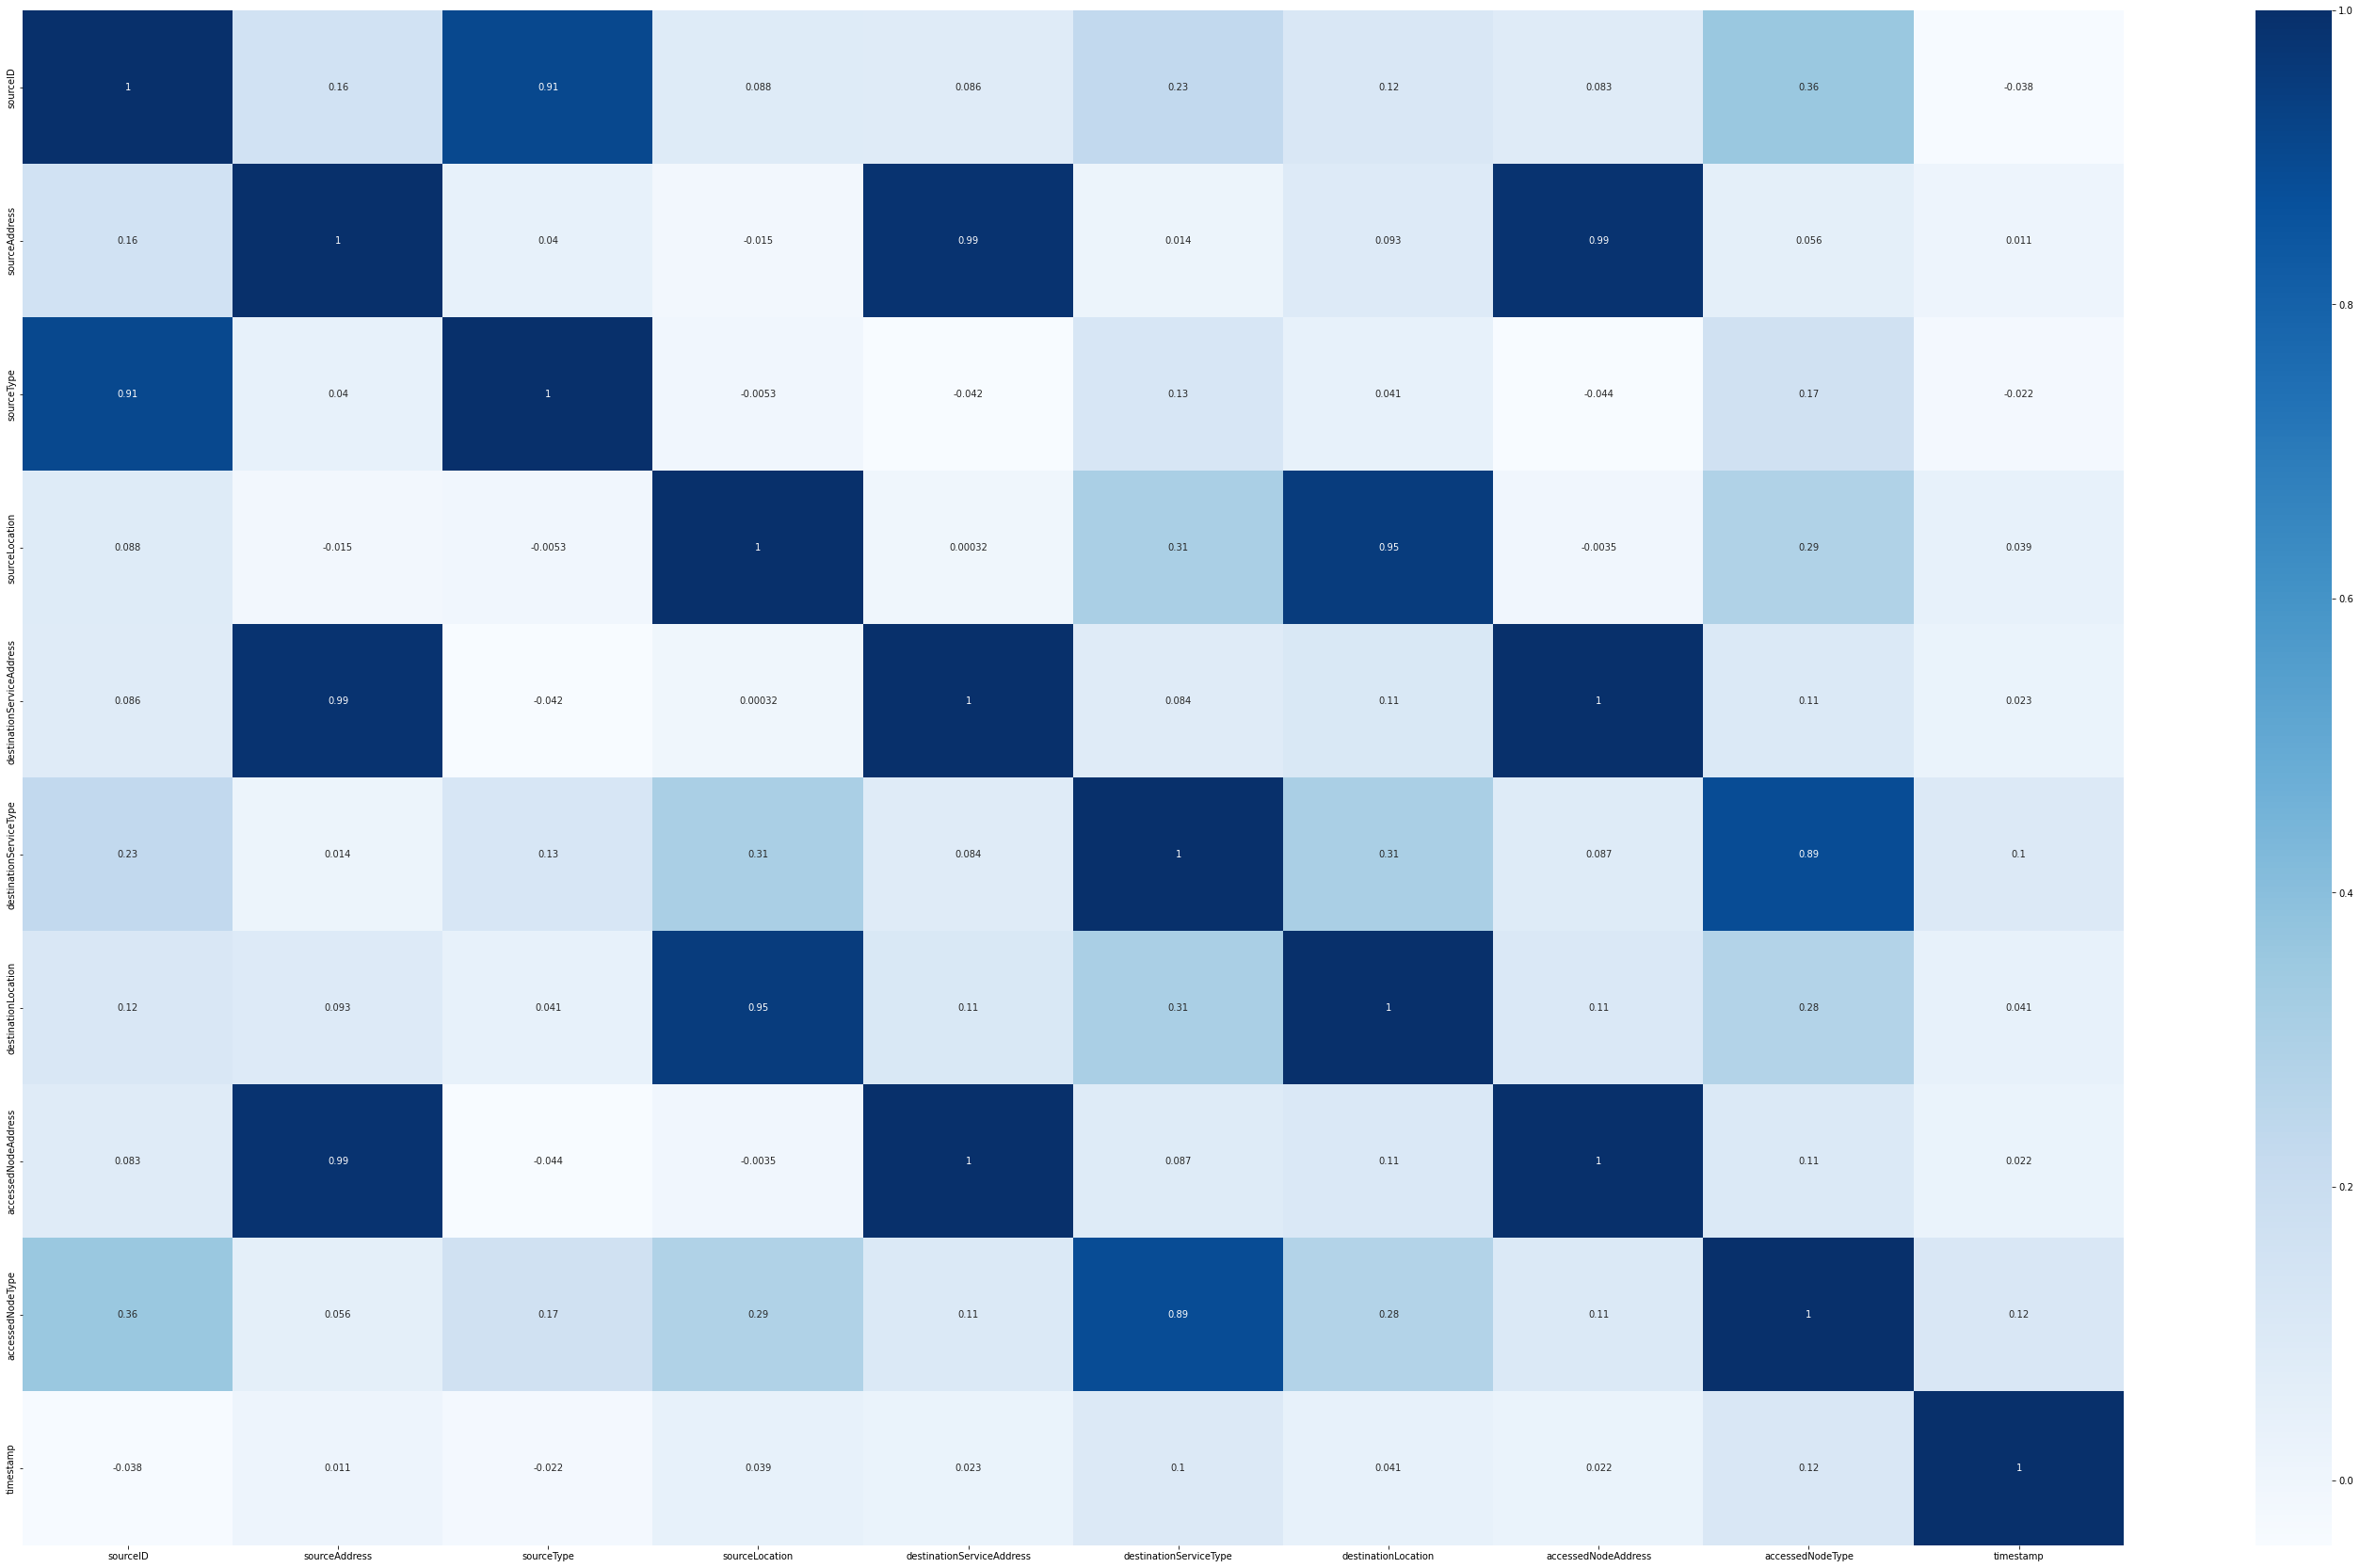

In [ ]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(50,30))
cor = Dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

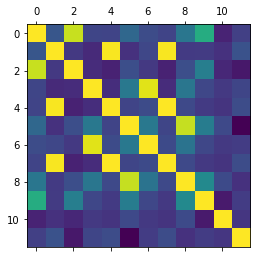

In [ ]:
corr_mat = Dataset.corr() 
plt.matshow(corr_mat) 
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='constant',verbose=0)
imputer=imputer.fit(x[:,[8]])
x[:,[8]]=imputer.transform(x[:,[8]])
imputer1=SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
imputer1=imputer1.fit(x[:,[10]])
x[:,[10]]=imputer1.transform(x[:,[10]])
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in range(0,10):
    x[:,i] = labelencoder_X.fit_transform(x[:,i])
x=np.array(x,dtype=np.float)
y=labelencoder_X.fit_transform(y)

ValueError: ignored